## **Region Based Image** **Segmentation**

**Region Growing**

In [ ]:
import math
# from IPython.display import HTML, Image, display
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random

In [ ]:
#converting image to array
im = Image.open('input1.jpg').convert('L')
arr = np.asarray(im)

out = Image.open('out1.jpg').convert('L')
arr_out = np.asarray(out)

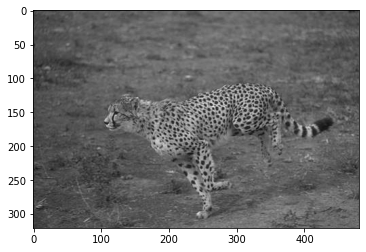

In [ ]:
rows,columns = np.shape(arr)
#print '\nrows',rows,'columns',columns
plt.figure()
plt.imshow(im)
plt.gray()

In [ ]:
print ('\nPlease select the initial seed point')


Please select the initial seed point


In [ ]:
pseed = plt.ginput(1)

<Figure size 432x288 with 0 Axes>

In [ ]:
# x=(int)(pseed[0][0])
# y=(int)(pseed[0][1])
x=int(179)
y=int(86)
seed_pixel=[]
seed_pixel.append(x)
seed_pixel.append(y)

In [ ]:
print('you clicked:',seed_pixel)

you clicked: [179, 86]


In [ ]:
plt.close()

In [ ]:
img_rg=np.zeros((rows+1,columns+1))
img_rg[seed_pixel[0]][seed_pixel[1]]=255.0
img_display=np.zeros((rows,columns))

In [ ]:
region_points=[]
region_points.append([x,y])

Streaming output truncated to the last 5000 lines.
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 319
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len 320
loop runs till length become zero:
len

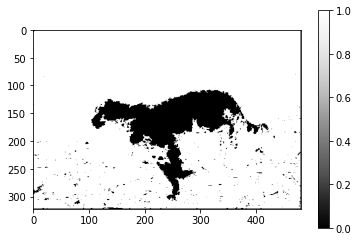

In [ ]:
#function for implementing region growing
def find_region():
  print('\n loop runs till region growing is complete')
  count=0
  x=[-1,0,1,-1,1,-1,0,1] # 8 connected
  y=[-1,-1,-1,0,0,1,1,1]
  while(len(region_points)>0):
    if(count==0):
      point = region_points.pop(0)
      i=point[0]
      j=point[1]
    print('loop runs till length become zero:')
    print('len',len(region_points))
    val=arr[i][j]
    lt=val-8
    ht=val+8
    for  k in range(8):
      if(img_rg[i+x[k]][j+y[k]]!=1):
        try:
          if arr[i+x[k]][j+y[k]]>lt and arr[i+x[k]][j+y[k]]<ht:
            img_rg[i+x[k]][j+y[k]]=1
            p=[0,0]
            p[0]=i+x[k]
            p[1]=j+y[k]
            if p not in region_points:
              if 0<p[0] < rows and 0<p[1] < columns:
                region_points.append([i+x[k],j+y[k]])
          else:
            img_rg[i+x[k]][j+y[k]]=0
        except IndexError:
          continue

    point=region_points.pop(0)
    i=point[0]
    j=point[1]
    count=count+1
find_region()
ground_out=np.zeros((rows,columns))
for i in range(rows):
  for j in range(columns):
    if arr_out[i][j] > 125:
      ground_out[i][j]=int(1)
    else:
      ground_out[i][j]=int(0)
tp=0
tn=0
fn=0
fp=0

for i in range(rows):
	for j in range(columns):
		if ground_out[i][j] == 1 and img_rg[i][j] == 1:
			tp = tp + 1
		if ground_out[i][j] == 0 and img_rg[i][j] == 0:
			tn = tn + 1
		if ground_out[i][j] == 1 and img_rg[i][j] == 0:
			fn = fn + 1
		if ground_out[i][j] == 0 and img_rg[i][j] == 1:
			fp = fp + 1
#computing false positive and True positive
tpr= float(tp)/(tp+fn)
print("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print("\nFscore:",fscore)


plt.figure()
plt.imshow(img_rg, cmap="Greys_r")
plt.colorbar()
plt.show()